## Linear Regression

y = θ0+ θ1x1+ θ2x2+ ⋯ + θnxn ## y is the predicted value                      

Theta is the model parameter : various theta values are feature weights

theta zero is the bias term

In [4]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sklearn.__version__

'0.24.2'

In [5]:
np.random.seed(42)

In [8]:
X = np.random.rand(100,1)
## create array of given shape with the values from [0,1)

y = 4 + 3*X + np.random.rand(100,1)

(0.0, 1.0, 0.0, 15.0)

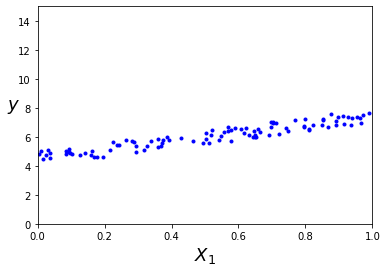

In [15]:
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$",fontsize=18, rotation=0) ## se with removing the rotation
plt.axis([0,1,0,15])


In [19]:
## np.c_ does the horizontal concatenation

X_b = np.c_[np.ones((100,1)),X]
X_b

array([[1.        , 0.64203165],
       [1.        , 0.08413996],
       [1.        , 0.16162871],
       [1.        , 0.89855419],
       [1.        , 0.60642906],
       [1.        , 0.00919705],
       [1.        , 0.10147154],
       [1.        , 0.66350177],
       [1.        , 0.00506158],
       [1.        , 0.16080805],
       [1.        , 0.54873379],
       [1.        , 0.6918952 ],
       [1.        , 0.65196126],
       [1.        , 0.22426931],
       [1.        , 0.71217922],
       [1.        , 0.23724909],
       [1.        , 0.3253997 ],
       [1.        , 0.74649141],
       [1.        , 0.6496329 ],
       [1.        , 0.84922341],
       [1.        , 0.65761289],
       [1.        , 0.5683086 ],
       [1.        , 0.09367477],
       [1.        , 0.3677158 ],
       [1.        , 0.26520237],
       [1.        , 0.24398964],
       [1.        , 0.97301055],
       [1.        , 0.39309772],
       [1.        , 0.89204656],
       [1.        , 0.63113863],
       [1.

In [20]:
# Now let’s compute θ using the Normal Equation. We will use the inv() function from
# NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and
# the dot() method for matrix multiplication:

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [21]:
theta_best

## θ0 = 4.215 and θ1 = 2.770

array([[4.60234805],
       [2.78516455]])

In [26]:
## lets predict now

X_new = np.array([[0],[2]])
X_new.shape  ## entry of 2 rows and 1 column

X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict


## 4.62 is the intercept
## 10.17 is the coefficient

array([[ 4.60234805],
       [10.17267716]])

(0.0, 1.0, 0.0, 10.0)

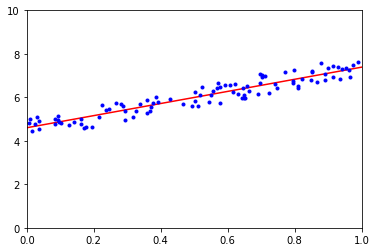

In [28]:
plt.plot(X_new, y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,1,0,10])


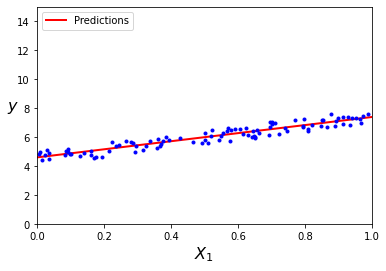

In [30]:
plt.plot(X_new, y_predict,'r-',linewidth=2,label='Predictions')
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize=16)
plt.ylabel("$y$",rotation=0, fontsize=16)
plt.axis([0,1,0,15])
plt.legend(loc='upper left')

Instead of doing this much, just simply use the Linear reg model from sklearn



In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.60234805]), array([[2.78516455]]))

In [33]:
lin_reg.predict(X_new)

array([[ 4.60234805],
       [10.17267716]])

In [35]:
##The LinearRegression class is based on the scipy.linalg.lstsq() function (the
##name stands for “least squares”), which you could call directly:

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

# ## This function computes θ = X+y, where
#  is the pseudoinverse of X (specifically the
# Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoin‐
# verse directly:


array([[4.60234805],
       [2.78516455]])

In [36]:
np.linalg.pinv(X_b).dot(y)

array([[4.60234805],
       [2.78516455]])

The pseudoinverse itself is computed using a standard matrix factorization technique 
called Singular Value Decomposition (SVD) that can decompose the training set
matrix X into the matrix multiplication of three matrices

Both the Normal Equation and the SVD approach get very slow
when the number of features grows large (e.g., 100,000). On the
positive side, both are linear with regards to the number of instan‐
ces in the training set (they are O(m)), so they handle large training
sets efficiently, provided they can fit in memory

# Linear Reg using Batch Gradient Descent

In [39]:
theta_path_bgd = []

def plot_gradient_descent(theta,eta,theta_path=None): ## eta is the learning rate of GD
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)

        gradients = 2/m  * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

        if theta_path is not None:
            theta_path.append(theta)

    plt.xlabel('$x_1$', fontsize=18)
    plt.axis([0,1,0,15])
    plt.title(r'$\eta = {}$'.format(eta), fontsize = 16)        




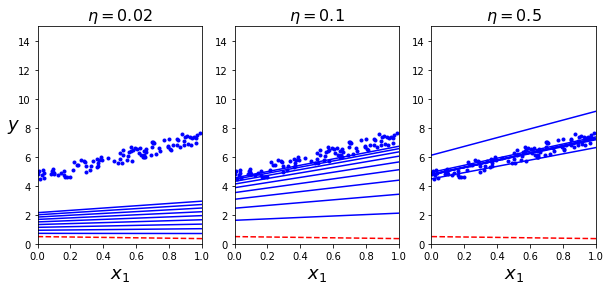

In [40]:

np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)
plt.show()

## Stochastic Gradient DEscent